<a href="https://colab.research.google.com/github/OCE1984/MScDataAnaltyicsPrinciples/blob/main/DAP_Final_Assessment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Data Analysis

## Importing Tools

To analyse the data, the analyst will require the use of pre-written algorithms. To ensure that the algorithms and their associated libraries are easy to find, it is standard to co-locate all required algorithms in one box at the beginning of the coding script.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

For this project, an open source dataset from kaggle will be used. The dataset can be obtained from the following location:

https://www.kaggle.com/datasets/mysarahmadbhat/airline-passenger-satisfaction/data

The dataset is a collection of customer satisfaction surveys for people who have travelled as a passenger on a commercial airline.

As the coding medium used is 'Google Colab', the dataset has been storedd on Github and will be pulled from that location for the analysis.

In [45]:
file_path = "https://raw.githubusercontent.com/OCE1984/MScDataAnaltyicsPrinciples/main/airline_passenger_satisfaction.csv"
df_original = pd.read_csv(file_path)

## Exploratory Data Analysis (EDA)

Once the dataset is loaded into the coding environment, the dataset must be analysed to determine the size, shape and content of the dataset. This step is known as Exploratory Data Analysis (EDA) and helps the analyst to understand the dataset before any analysis is carried out.

This will not only direct the analyst in the most suitable types of analysis to use, but also determine whether or not the dataset is configured correctly for data analysis.

In [46]:
print("\nDataset Info:")
df_original.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking       

By looking at the 'info' of the dataset, it's possible to see the structure and the content of the dataset.

First, the number of records contained within the dataset is 129,880 entries. It is recommended that a dataset has a minimum of 500 entries for machine learning algorithms to be effective, so the dataset can be used for machine learning purposes. This is to ensure that there is enough data to split into training and test subsets of the data and still provide enough different combinations of possible data configurations to identify trends.

Next, it's possible to see that there are 24 columns in total, as well as the name of each of the columns within the dataset. This is extremely useful as it allows the analyst to transform the data within any given column contained in the dataset.

Then, it can also be seen how many 'non-null' values there are in each column. If the value is less than the number of entries in the dataset, then that column is gong to have missing values. This can be verified by running a 'missing values' code to clearly show where any missing entries are for any given column.

In [6]:
print("\nMissing Values:")
print(df_original.isnull().sum())


Missing Values:
ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Enterta

The 'missing values' code has confirmed that there are 393 missing values from the 'Arrival Delay' column. Before any analysis can be carried out, the null-values will have to be addressed to ensure that they don't influence the accuracy of any modelling carried out. This will be addressed in the next section 'Data Cleaning'.

Finally, the data type (DType), is visible to show what kind of data each column has. The 'Arrival Delay' is a float format, so this will have to be converted to an integer format in the 'Data Cleaning' section.

Now that the dataset is better understood, it is good practice to create a 'Data Dictionary'. The purpose of the dictionary to is communicate to anyone else who needs to interact with the dataset. It explains all the columns and provides the context behind the variables within the columns.

In [7]:
column_descriptions = {
    "ID": "Unique identifier for each passenger",
    "Gender": "Passenger's gender (Male/Female)",
    "Age": "Passenger's age in years",
    "Customer Type": "Type of customer (Loyal or Disloyal customer)",
    "Type of Travel": "Purpose of flight (Personal or Business)",
    "Class": "Ticket class (Economy, Premium Economy, Business)",
    "Flight Distance": "Distance of the flight in miles",
    "Departure Delay": "Departure delay duration (minutes)",
    "Arrival Delay": "Arrival delay duration (minutes)",
    "Departure and Arrival Time Convenience": "Rating for convenience of departure/arrival times",
    "Ease of Online Booking": "Rating of the ease of online booking, from 1 (lowest) to 5 (highest) - 0 means 'not applicable'",
    "Check-in Service": "Rating of check-in service quality, from 1 (lowest) to 5 (highest) - 0 means 'not applicable'",
    "Online Boarding": "Rating of online boarding experience, from 1 (lowest) to 5 (highest) - 0 means 'not applicable'",
    "Gate Location": "Rating for convenience/location of gate, from 1 (lowest) to 5 (highest) - 0 means 'not applicable'",
    "On-board Service": "Rating for onboard customer service, from 1 (lowest) to 5 (highest) - 0 means 'not applicable'",
    "Seat Comfort": "Rating for comfort of the seats, from 1 (lowest) to 5 (highest) - 0 means 'not applicable'",
    "Leg Room Service": "Rating for legroom availability, from 1 (lowest) to 5 (highest) - 0 means 'not applicable'",
    "Cleanliness": "Rating for cleanliness of the aircraft, from 1 (lowest) to 5 (highest) - 0 means 'not applicable'",
    "Food and Drink": "Rating for onboard food and drink quality, from 1 (lowest) to 5 (highest) - 0 means 'not applicable'",
    "In-flight Service": "Rating for overall inflight service, from 1 (lowest) to 5 (highest) - 0 means 'not applicable'",
    "In-flight Wifi Service": "Rating for onboard wifi service quality, from 1 (lowest) to 5 (highest) - 0 means 'not applicable'",
    "In-flight Entertainment": "Rating for inflight entertainment options, from 1 (lowest) to 5 (highest) - 0 means 'not applicable'",
    "Baggage Handling": "Rating for baggage handling experience, from 1 (lowest) to 5 (highest) - 0 means 'not applicable'",
    "Satisfaction": "Overall passenger satisfaction (Satisfied/Neutral or Dissatisfied)",
}

data_dict = pd.DataFrame({
    "Column Name": df_original.columns,
    "Data Type": df_original.dtypes.values,
    "Description": [column_descriptions.get(col, "No description provided") for col in df_original.columns]
})

data_dict.to_csv("completed_data_dictionary.csv", index=False)

In [8]:
print("\nSummary Statistics:")
df_original.describe()


Summary Statistics:


,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


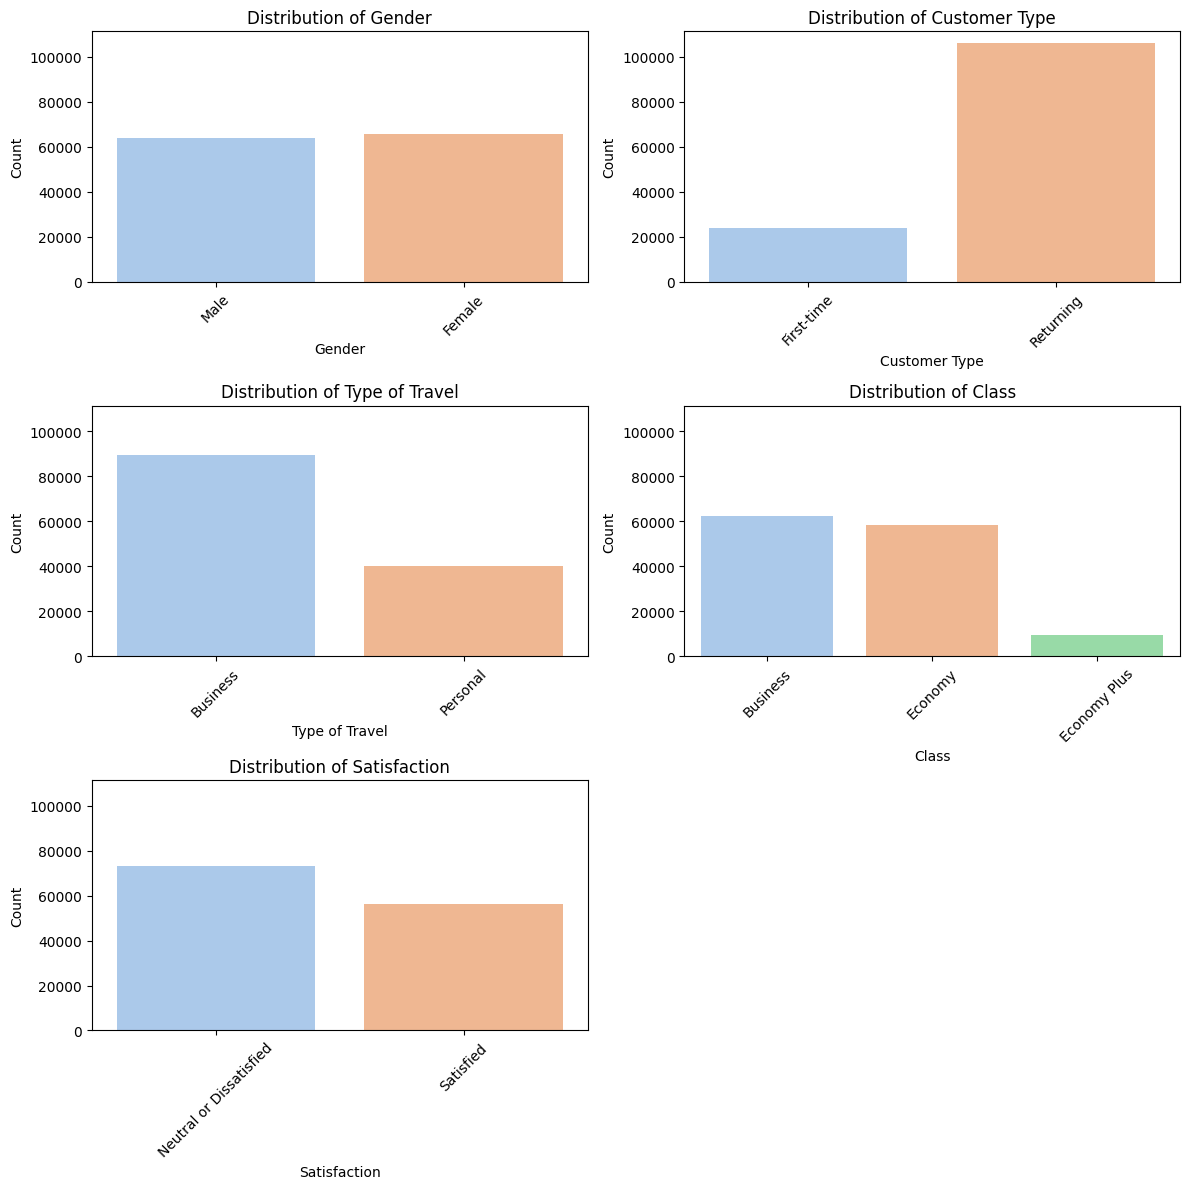

In [9]:
categorical_cols = df_original.select_dtypes(include='object').columns

# Create a figure and grid of subplots

    # Calculate number of rows needed for the grid
num_cols = 2  # Figures per row
num_rows = math.ceil(len(categorical_cols) / num_cols)

# Create a figure and grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 4))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate and plot on subplots
max_count = 0  # Initialize variable to store maximum count


# Iterate and plot on subplots
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df_original, x=col, palette="pastel", ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

    # Update max_count if current plot has a higher count
    current_max = axes[i].get_ylim()[1]
    if current_max > max_count:
        max_count = current_max

# Set ylim for all subplots to the maximum count
for ax in axes:
    ax.set_ylim(0, max_count)

# Hide any unused subplots
for i in range(len(categorical_cols), len(axes)):
    axes[i].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

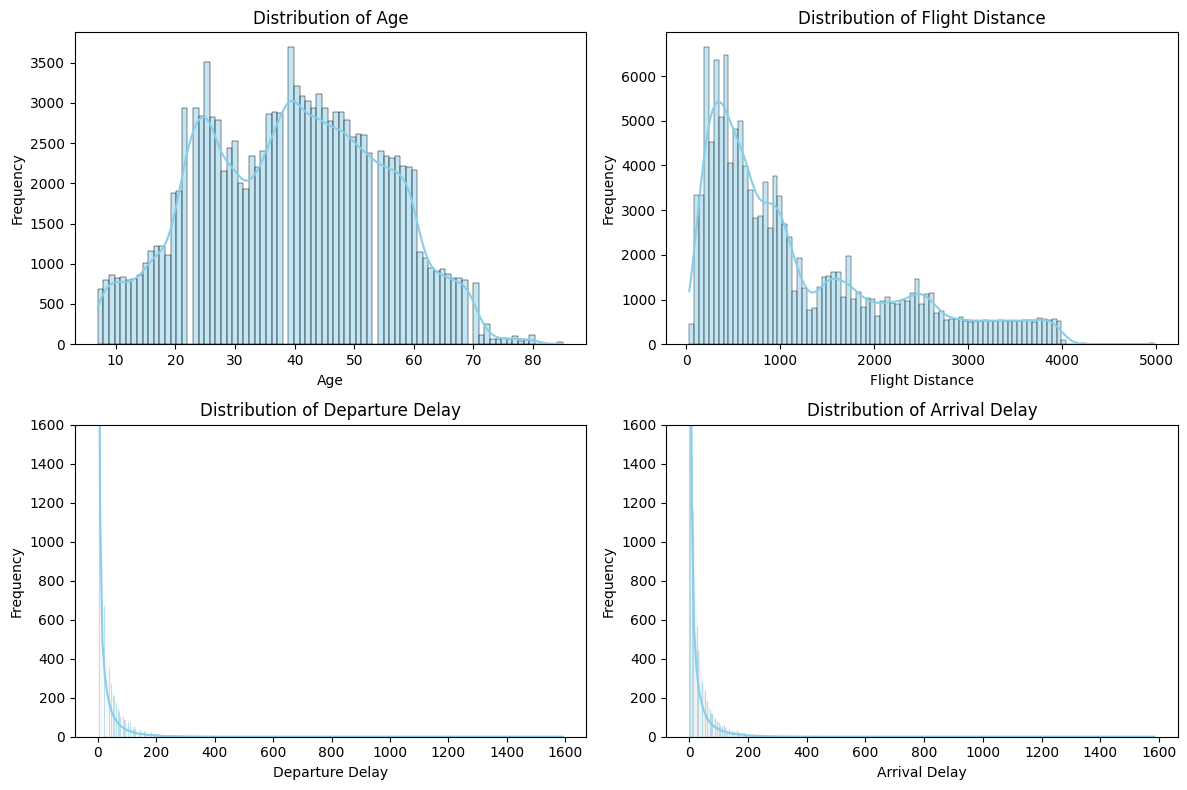

In [20]:
# Select the numerical columns for histograms
numerical_cols = ['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay']

# Create a figure and grid of subplots
num_cols = 2  # Figures per row
num_rows = math.ceil(len(numerical_cols) / num_cols)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 4))
axes = axes.flatten()  # Flatten for easier indexing

# Iterate and plot histograms with KDE
for i, col in enumerate(numerical_cols):
    sns.histplot(data=df_original, x=col, kde=True, ax=axes[i], color='skyblue', line_kws={'color': 'red'})
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

    # Set y-axis limit for Departure Delay and Arrival Delay
    if col in ['Departure Delay', 'Arrival Delay']:
        axes[i].set_ylim(0, 1600)  # Set max y-value to 1600

# Hide any unused subplots
for i in range(len(numerical_cols), len(axes)):
    axes[i].set_visible(False)

# Adjust layout and display
plt.tight_layout()
plt.show()

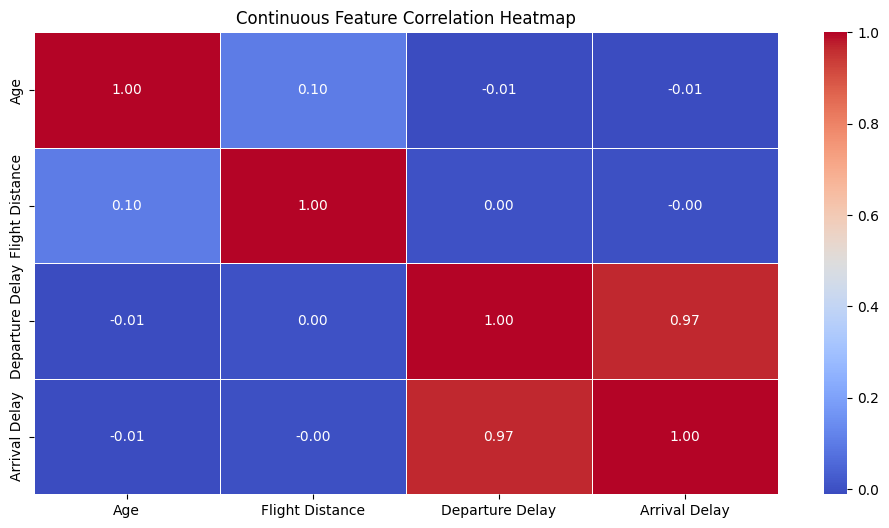

In [21]:
# Before the heatmap code:
numerical_cols = ['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay']

# Then generate the heatmap with:
plt.figure(figsize=(12, 6))
sns.heatmap(df_original[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Continuous Feature Correlation Heatmap")
plt.show()

## Cleaning the Data

In [87]:
df_clean = df_original.copy()
df_clean.drop(columns=["ID"], inplace=True)

In [88]:
# Replace missing Arrival Delay with Departure Delay values
df_clean["Arrival Delay"].fillna(df_clean["Departure Delay"], inplace=True)
df_clean["Arrival Delay"] = df_clean["Arrival Delay"].round().astype(int)

# Verify that there are no more missing values
print("Remaining missing Arrival Delay values:", df_clean["Arrival Delay"].isnull().sum())
print("Data type of Arrival Delay:", df_clean["Arrival Delay"].dtype)

Remaining missing Arrival Delay values: 0
Data type of Arrival Delay: int64


####Scaling

In [89]:
numerical_cols = ['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay']
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
df_clean[numerical_cols] = scaler.fit_transform(df_clean[numerical_cols])

# Display the scaled numerical columns
print(df_clean[numerical_cols].head())


        Age  Flight Distance  Departure Delay  Arrival Delay
0  0.566960        -0.370261        -0.333948      -0.263219
1 -0.292868        -0.370261         0.296454       0.617623
2  0.103976        -0.338179        -0.386481      -0.392754
3  0.699242         0.716512        -0.386481      -0.392754
4  0.633101         2.285515        -0.386481      -0.366847


#### **Categorical Variables: Binarisation (0/1) and One Hot Encoding**

Columns with categories were identified as pandas type 'Object'.

In order to make these categorical variables processable by the machine learning algorithms, they need to be converted to numbers. I will convert the categories of binary variables directly to 0 and 1, while for variables with more than one category I will use one-hot encoding.

One-hot encoding is a technique used in data preprocessing to convert categorical data (with more than 2 categories) into a numerical format.  

In [40]:
#df_original.columns

Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [43]:
#categorical_columns = df_original.select_dtypes(include=['object']).columns.tolist()
#print(categorical_columns)
#df_original.info()

Step 1: extract binary categorical variables to convert them to 0 and 1

In [90]:
# Create a dictionary to store encoding mappings
encoding_mappings = []

# Select object type columns
object_cols = df_clean.select_dtypes(include=['object']).columns

# Filter for columns with 2 or fewer unique values
binary_categorical_cols = [col for col in object_cols
                           if df_clean[col].nunique() <= 2]

# Convert binary categorical columns to 0 and 1
for col in binary_categorical_cols:
    # Get unique values in the column
    unique_values = df_clean[col].unique()

    # Create a mapping dictionary for the column
    mapping = {unique_values[0]: 0, unique_values[1]: 1}

    # Apply the mapping to the column
    df_clean[col] = df_clean[col].map(mapping)

    # Store the mapping for the legend table
    encoding_mappings.extend([[col, val, encoded] for val, encoded in mapping.items()])

# Create the legend table
legend_table = pd.DataFrame(encoding_mappings, columns=["Column Name", "Original Value", "Encoded Value"])

# Display the legend table
print(legend_table)

      Column Name           Original Value  Encoded Value
0          Gender                     Male              0
1          Gender                   Female              1
2   Customer Type               First-time              0
3   Customer Type                Returning              1
4  Type of Travel                 Business              0
5  Type of Travel                 Personal              1
6    Satisfaction  Neutral or Dissatisfied              0
7    Satisfaction                Satisfied              1


In [91]:

for col in df_clean.columns:
  print(col)

Gender
Age
Customer Type
Type of Travel
Class
Flight Distance
Departure Delay
Arrival Delay
Departure and Arrival Time Convenience
Ease of Online Booking
Check-in Service
Online Boarding
Gate Location
On-board Service
Seat Comfort
Leg Room Service
Cleanliness
Food and Drink
In-flight Service
In-flight Wifi Service
In-flight Entertainment
Baggage Handling
Satisfaction


Step 2: extract categorical variables with more than two categories and One-hot Encode them

In [92]:
# prompt: select from df_clean all columns with more than 2 categories

# Identify columns with more than 2 categories
cols_to_Onehot_Encode = [col for col in df_clean.select_dtypes(include='object') if df_clean[col].nunique() > 2]

cols_to_Onehot_Encode.extend(['Departure and Arrival Time Convenience','Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling'])
# Select those columns from the DataFrame
#df_selected = df_clean[cols_more_than_2_categories]

#print(df_selected.head())
cols_to_Onehot_Encode


['Class',
 'Departure and Arrival Time Convenience',
 'Ease of Online Booking',
 'Check-in Service',
 'Online Boarding',
 'Gate Location',
 'On-board Service',
 'Seat Comfort',
 'Leg Room Service',
 'Cleanliness',
 'Food and Drink',
 'In-flight Service',
 'In-flight Wifi Service',
 'In-flight Entertainment',
 'Baggage Handling']

In [95]:
encoder = OneHotEncoder(sparse_output=False)  # or sparse=False for older versions
#encoder
one_hot_encoded = encoder.fit_transform(df_clean[cols_to_Onehot_Encode])
#one_hot_encoded

# Get feature names for the encoded columns
encoded_column_names = encoder.get_feature_names_out(cols_to_Onehot_Encode)
#encoded_column_names
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoded_column_names)
#one_hot_df

,Class_Business,Class_Economy,Class_Economy Plus,Departure and Arrival Time Convenience_0,Departure and Arrival Time Convenience_1,Departure and Arrival Time Convenience_2,Departure and Arrival Time Convenience_3,Departure and Arrival Time Convenience_4,Departure and Arrival Time Convenience_5,Ease of Online Booking_0,...,In-flight Entertainment_1,In-flight Entertainment_2,In-flight Entertainment_3,In-flight Entertainment_4,In-flight Entertainment_5,Baggage Handling_1,Baggage Handling_2,Baggage Handling_3,Baggage Handling_4,Baggage Handling_5
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
129876,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
129877,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
129878,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [96]:
# merge everything back together

# Concatenate the encoded DataFrame with the original DataFrame
df_clean = pd.concat([df_clean, one_hot_df], axis=1)

# Drop the original categorical columns
df_clean = df_clean.drop(columns=cols_to_Onehot_Encode)
df_clean.columns

Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Flight Distance',
       'Departure Delay', 'Arrival Delay', 'Satisfaction', 'Class_Business',
       'Class_Economy', 'Class_Economy Plus',
       'Departure and Arrival Time Convenience_0',
       'Departure and Arrival Time Convenience_1',
       'Departure and Arrival Time Convenience_2',
       'Departure and Arrival Time Convenience_3',
       'Departure and Arrival Time Convenience_4',
       'Departure and Arrival Time Convenience_5', 'Ease of Online Booking_0',
       'Ease of Online Booking_1', 'Ease of Online Booking_2',
       'Ease of Online Booking_3', 'Ease of Online Booking_4',
       'Ease of Online Booking_5', 'Check-in Service_0', 'Check-in Service_1',
       'Check-in Service_2', 'Check-in Service_3', 'Check-in Service_4',
       'Check-in Service_5', 'Online Boarding_0', 'Online Boarding_1',
       'Online Boarding_2', 'Online Boarding_3', 'Online Boarding_4',
       'Online Boarding_5', 'Gate Location_0',

In [36]:
# prompt: create a table explaining the changes made during the hot encoding and what the new values in each column represents. Pull the information from the two data frames and compile, rather than everything as manually entered text

import pandas as pd

# Assuming df_original and df_encoded are defined as in the provided code

# Create a list to store the changes
changes = []

# Iterate through the categorical columns
for col in df_original.select_dtypes(include=['object']).columns:
    # Get unique values in original dataframe
    original_values = df_original[col].unique()

    # Find the corresponding one-hot encoded columns in df_encoded
    encoded_cols = [c for c in df_encoded.columns if c.startswith(col + '_')]

    for val in original_values:
      # Find the encoded columns that represent the values in original columns
      encoded_col = [c for c in encoded_cols if c.endswith(val.replace(" ", "_"))]
      if len(encoded_col) ==1: # check if there is just one match
        new_col_name = f'{col}_{val.replace(" ", "_")}'
      if new_col_name in encoded_cols:
        changes.append([col, val, new_col_name, "1 if the original value was '" + val + "' else 0"])
      #The following line was indented too far, causing the IndentationError
      #It should be aligned with the 'if' statement above it.
      if len(encoded_col)>1:
        print(f"Warning: Multiple encoded columns found for '{col}' and value '{val}'")

# Create a table
change_table = pd.DataFrame(changes, columns=["Original Column", "Original Value", "New Column", "New Value Representation"])
change_table

,Original Column,Original Value,New Column,New Value Representation
0,Gender,Male,Gender_Male,1 if the original value was 'Male' else 0
1,Gender,Female,Gender_Female,1 if the original value was 'Female' else 0
2,Customer Type,First-time,Customer Type_First-time,1 if the original value was 'First-time' else 0
3,Customer Type,Returning,Customer Type_Returning,1 if the original value was 'Returning' else 0
4,Type of Travel,Business,Type of Travel_Business,1 if the original value was 'Business' else 0
5,Type of Travel,Personal,Type of Travel_Personal,1 if the original value was 'Personal' else 0
6,Class,Business,Class_Business,1 if the original value was 'Business' else 0
7,Class,Economy,Class_Economy,1 if the original value was 'Economy' else 0
8,Class,Economy Plus,Class_Economy,1 if the original value was 'Economy Plus' else 0
9,Satisfaction,Satisfied,Satisfaction_Satisfied,1 if the original value was 'Satisfied' else 0


In [26]:
# prompt: create hot encoding for all columns where the data type is 'object', then print the head of the data for those columns once hot encoded

object_cols = df_original.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df_original, columns=object_cols, drop_first=True)

# Get the names of the newly created one-hot encoded columns
encoded_cols = [col for col in df_encoded.columns if col.startswith(tuple(object_cols))]

# Print the head of the DataFrame with the encoded columns
print(df_encoded[encoded_cols].head())


   Gender_Male  Customer Type_Returning  Type of Travel_Personal  \
0         True                    False                    False   
1        False                     True                    False   
2         True                     True                    False   
3         True                     True                    False   
4        False                     True                    False   

   Class_Economy  Class_Economy Plus  Satisfaction_Satisfied  
0          False               False                   False  
1          False               False                    True  
2          False               False                    True  
3          False               False                    True  
4          False               False                    True  


## Feature Engineering

- Convert binary catergorical values into 0 & 1 one column in, one column out
- Multi-level categorical variables into separate columns (one-hot encoding - 'Class' & all variables)
- *Age, Departure Delay, Arrival Delay, Flight Distance scale --> feature scaling, is not necessary for random forest (for the moment skip this)*

## Supervised Machine Learning

- Partition data into training and test set
- Use random forest as classifier X-predictors (all variables) Y-Satisfaction

x1 + x2 + x3 + x4 = Y (satisfied/not satisfied)
- Fit model on training set: X_training set (matrix) Y_training column

- Test the model: feed to the model the X_test set to predict the Y_test column
- Evaluate model (accuracy, precision, f1-score, confusion matrix, AUROC)

In [ ]:
# Select categorical columns
categorical_cols = ["Gender", "Customer Type", "Type of Travel", "Class", "Satisfaction"]

# Create a dictionary to store mappings
encoding_mappings = []

# Apply Label Encoding
label_encoders = {}
df_encoded = df_original.copy()

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])  # Convert categorical to numerical
    label_encoders[col] = le  # Store encoder for reference

    # Store mappings
    for category, encoded_value in zip(le.classes_, le.transform(le.classes_)):
        encoding_mappings.append([col, category, encoded_value])

# Create a DataFrame to display mappings
encoding_summary_df = pd.DataFrame(encoding_mappings, columns=["Column Name", "Category", "Encoded Value"])

# Display result
print(encoding_summary_df)


       Column Name                 Category  Encoded Value
0           Gender                   Female              0
1           Gender                     Male              1
2    Customer Type               First-time              0
3    Customer Type                Returning              1
4   Type of Travel                 Business              0
5   Type of Travel                 Personal              1
6            Class                 Business              0
7            Class                  Economy              1
8            Class             Economy Plus              2
9     Satisfaction  Neutral or Dissatisfied              0
10    Satisfaction                Satisfied              1


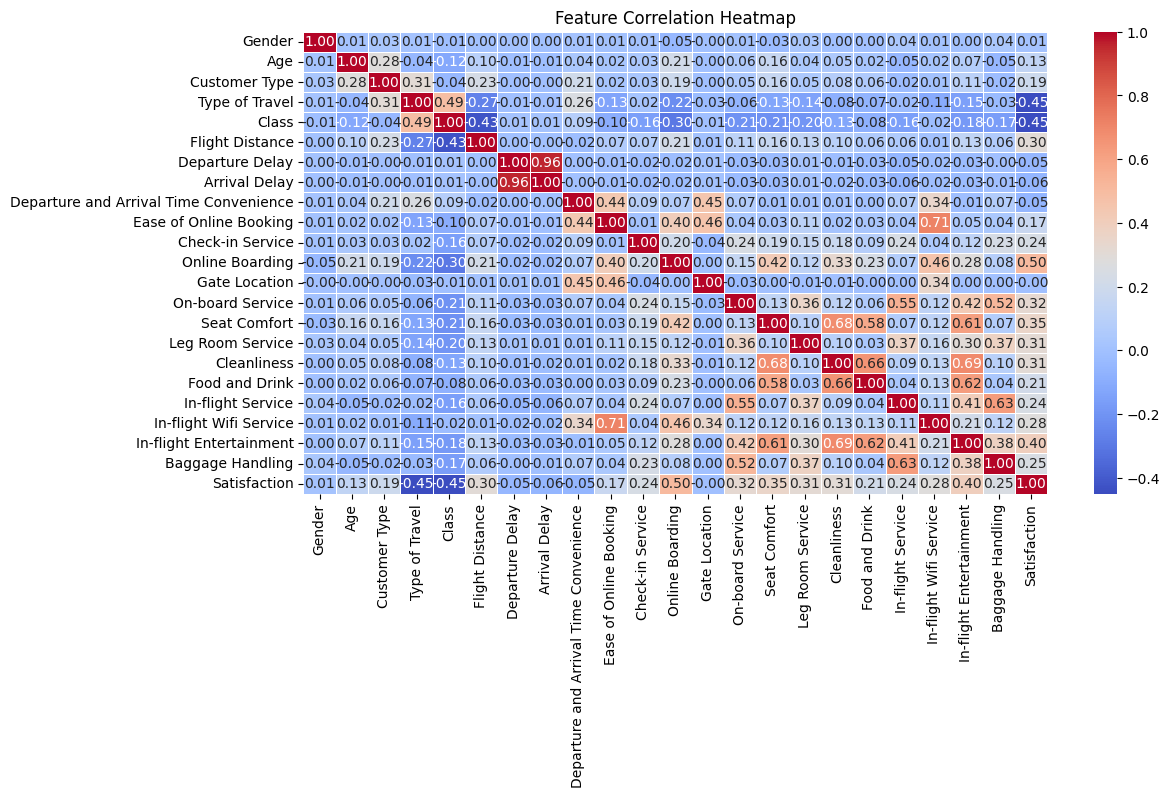

In [ ]:
# Before the heatmap code:
numerical_cols = df_encoded.select_dtypes(include=np.number).columns.tolist()

# Then generate the heatmap with:
plt.figure(figsize=(12, 6))
sns.heatmap(df_encoded[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])
df_encoded.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1.014878,0.566960,-2.112281,-0.669366,-0.955724,-0.370261,-0.333948,-0.261490,-0.037727,0.173445,...,-0.297587,1.181428,-1.026310,1.304487,1.349867,1.153946,0.204090,1.230787,1.159206,-0.876487
1,-0.985340,-0.292868,0.473422,-0.669366,-0.955724,-0.370261,0.296454,0.623553,-0.692719,-0.539957,...,1.256300,0.423441,1.252898,1.304487,-0.153973,1.153946,-0.548166,1.230787,1.159206,1.140918
2,1.014878,0.103976,0.473422,-0.669366,-0.955724,-0.338179,-0.386481,-0.391644,0.617265,0.886847,...,-0.297587,1.181428,-0.266574,1.304487,1.349867,-0.545774,0.956346,-0.268414,-0.535681,1.140918
3,1.014878,0.699242,0.473422,-0.669366,-0.955724,0.716512,-0.386481,-0.391644,-0.692719,-0.539957,...,1.256300,1.181428,1.252898,0.543264,0.597947,1.153946,-0.548166,1.230787,1.159206,1.140918
4,-0.985340,0.633101,0.473422,-0.669366,-0.955724,2.285515,-0.386481,-0.365613,-0.037727,0.173445,...,-0.297587,0.423441,0.493162,1.304487,0.597947,-0.545774,0.204090,-0.268414,-0.535681,1.140918


## Feature Engineering

In [ ]:
df_encoded["Long Delay"] = (df_encoded["Arrival Delay"] > 30).astype(int)
df_encoded.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Long Delay
0,1.014878,0.566960,-2.112281,-0.669366,-0.955724,-0.370261,-0.333948,-0.261490,-0.037727,0.173445,...,1.181428,-1.026310,1.304487,1.349867,1.153946,0.204090,1.230787,1.159206,-0.876487,0
1,-0.985340,-0.292868,0.473422,-0.669366,-0.955724,-0.370261,0.296454,0.623553,-0.692719,-0.539957,...,0.423441,1.252898,1.304487,-0.153973,1.153946,-0.548166,1.230787,1.159206,1.140918,0
2,1.014878,0.103976,0.473422,-0.669366,-0.955724,-0.338179,-0.386481,-0.391644,0.617265,0.886847,...,1.181428,-0.266574,1.304487,1.349867,-0.545774,0.956346,-0.268414,-0.535681,1.140918,0
3,1.014878,0.699242,0.473422,-0.669366,-0.955724,0.716512,-0.386481,-0.391644,-0.692719,-0.539957,...,1.181428,1.252898,0.543264,0.597947,1.153946,-0.548166,1.230787,1.159206,1.140918,0
4,-0.985340,0.633101,0.473422,-0.669366,-0.955724,2.285515,-0.386481,-0.365613,-0.037727,0.173445,...,0.423441,0.493162,1.304487,0.597947,-0.545774,0.204090,-0.268414,-0.535681,1.140918,0


In [ ]:
df_encoded["Loyal Business Traveler"] = ((df_encoded["Customer Type"] == 0) & (df_encoded["Type of Travel"] == 0)).astype(int)
df_encoded.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Long Delay,Loyal Business Traveler
0,1.014878,0.566960,-2.112281,-0.669366,-0.955724,-0.370261,-0.333948,-0.261490,-0.037727,0.173445,...,-1.026310,1.304487,1.349867,1.153946,0.204090,1.230787,1.159206,-0.876487,0,0
1,-0.985340,-0.292868,0.473422,-0.669366,-0.955724,-0.370261,0.296454,0.623553,-0.692719,-0.539957,...,1.252898,1.304487,-0.153973,1.153946,-0.548166,1.230787,1.159206,1.140918,0,0
2,1.014878,0.103976,0.473422,-0.669366,-0.955724,-0.338179,-0.386481,-0.391644,0.617265,0.886847,...,-0.266574,1.304487,1.349867,-0.545774,0.956346,-0.268414,-0.535681,1.140918,0,0
3,1.014878,0.699242,0.473422,-0.669366,-0.955724,0.716512,-0.386481,-0.391644,-0.692719,-0.539957,...,1.252898,0.543264,0.597947,1.153946,-0.548166,1.230787,1.159206,1.140918,0,0
4,-0.985340,0.633101,0.473422,-0.669366,-0.955724,2.285515,-0.386481,-0.365613,-0.037727,0.173445,...,0.493162,1.304487,0.597947,-0.545774,0.204090,-0.268414,-0.535681,1.140918,0,0


In [ ]:
df_original.columns

Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

<ipython-input-46-32d83d55fb5f>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")


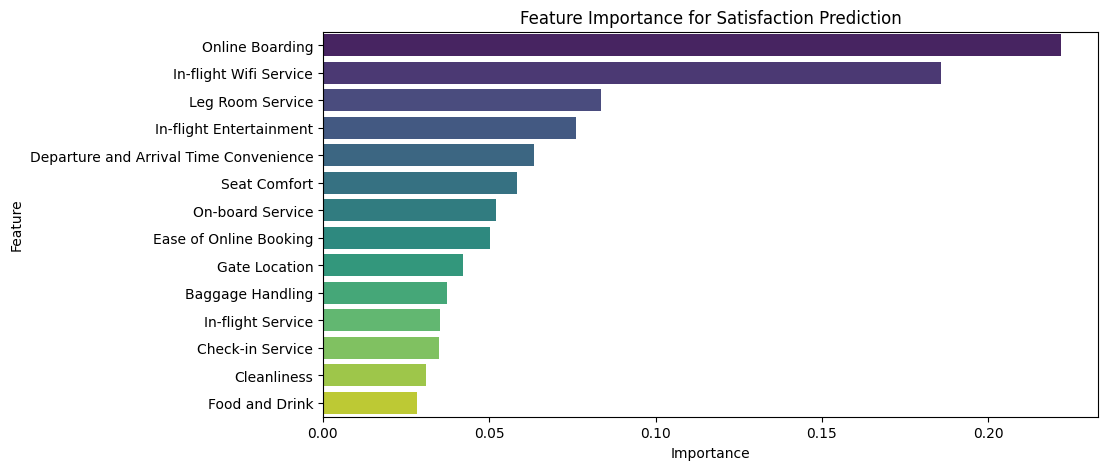

                                   Feature  Importance  Normalized Weight
5                          Online Boarding    0.221870           0.221870
0                   In-flight Wifi Service    0.185810           0.185810
9                         Leg Room Service    0.083620           0.083620
7                  In-flight Entertainment    0.076178           0.076178
1   Departure and Arrival Time Convenience    0.063575           0.063575
6                             Seat Comfort    0.058215           0.058215
8                         On-board Service    0.051945           0.051945
2                   Ease of Online Booking    0.050277           0.050277
3                            Gate Location    0.041966           0.041966
10                        Baggage Handling    0.037332           0.037332
12                       In-flight Service    0.035190           0.035190
11                        Check-in Service    0.034806           0.034806
13                             Cleanli

In [ ]:
# Select features and target
rating_features = ["In-flight Wifi Service", "Departure and Arrival Time Convenience", "Ease of Online Booking",
                   "Gate Location", "Food and Drink", "Online Boarding", "Seat Comfort", "In-flight Entertainment",
                   "On-board Service", "Leg Room Service", "Baggage Handling", "Check-in Service",
                   "In-flight Service", "Cleanliness"]

rating_features = [col.strip() for col in rating_features]  #Remove any leading/trailing spaces to ensure name consistency

X = df_original[rating_features]
y = df_original["Satisfaction"]  # Target variable

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance scores
feature_importances = rf.feature_importances_
importance_df = pd.DataFrame({"Feature": rating_features, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")
plt.title("Feature Importance for Satisfaction Prediction")
plt.show()

# Normalize weights to sum to 1
importance_df["Normalized Weight"] = importance_df["Importance"] / importance_df["Importance"].sum()

# Print final feature weights
print(importance_df)

# Compute weighted satisfaction score
df_encoded["Weighted Satisfaction Score"] = sum(df_encoded[feature] * weight for feature, weight in zip(importance_df["Feature"], importance_df["Normalized Weight"]))


## Machine Learning

### Supervised

#### Performance Metrics

Classification Report:
                          precision    recall  f1-score   support

Neutral or Dissatisfied       0.94      0.96      0.95     14723
              Satisfied       0.95      0.92      0.94     11253

               accuracy                           0.95     25976
              macro avg       0.95      0.94      0.95     25976
           weighted avg       0.95      0.95      0.95     25976



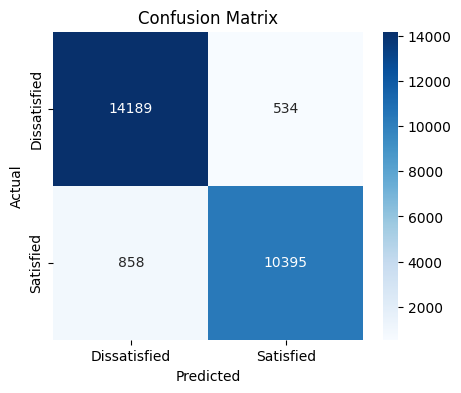

Accuracy: 0.9464
Precision: 0.9511
Recall: 0.9238
F1-score: 0.9372


In [ ]:
# Make predictions on the test set
y_pred = rf.predict(X_test)

# Compute performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label="Satisfied")
recall = recall_score(y_test, y_pred, pos_label="Satisfied")
f1 = f1_score(y_test, y_pred, pos_label="Satisfied")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Dissatisfied", "Satisfied"], yticklabels=["Dissatisfied", "Satisfied"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

In [ ]:
# Create custom scorers
precision_scorer = make_scorer(precision_score, pos_label="Satisfied")
recall_scorer = make_scorer(recall_score, pos_label="Satisfied")
f1_scorer = make_scorer(f1_score, pos_label="Satisfied")

# Perform 5-fold cross-validation
cv_accuracy = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
cv_precision = cross_val_score(rf, X_train, y_train, cv=5, scoring=precision_scorer)
cv_recall = cross_val_score(rf, X_train, y_train, cv=5, scoring=recall_scorer)
cv_f1 = cross_val_score(rf, X_train, y_train, cv=5, scoring=f1_scorer)

# Print results
print(f"Cross-Validation Accuracy: {cv_accuracy.mean():.4f} ± {cv_accuracy.std():.4f}")
print(f"Cross-Validation Precision: {cv_precision.mean():.4f} ± {cv_precision.std():.4f}")
print(f"Cross-Validation Recall: {cv_recall.mean():.4f} ± {cv_recall.std():.4f}")
print(f"Cross-Validation F1-score: {cv_f1.mean():.4f} ± {cv_f1.std():.4f}")

Cross-Validation Accuracy: 0.9449 ± 0.0019
Cross-Validation Precision: 0.9510 ± 0.0031
Cross-Validation Recall: 0.9208 ± 0.0024
Cross-Validation F1-score: 0.9356 ± 0.0022


#### Feature Stability

                                   Feature  Mean Importance   Std Dev
0                   In-flight Wifi Service         0.209235  0.002630
5                          Online Boarding         0.084886  0.001712
9                         Leg Room Service         0.050412  0.001571
3                            Gate Location         0.043486  0.000813
7                  In-flight Entertainment         0.032788  0.000928
1   Departure and Arrival Time Convenience         0.030836  0.000435
12                       In-flight Service         0.025470  0.001024
11                        Check-in Service         0.022278  0.001050
8                         On-board Service         0.021535  0.000859
13                             Cleanliness         0.021497  0.000615
10                        Baggage Handling         0.019749  0.000804
6                             Seat Comfort         0.018386  0.000746
4                           Food and Drink         0.015980  0.000583
2                   

<ipython-input-26-6996a4127b78>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=perm_df["Mean Importance"], y=perm_df["Feature"], palette="plasma")


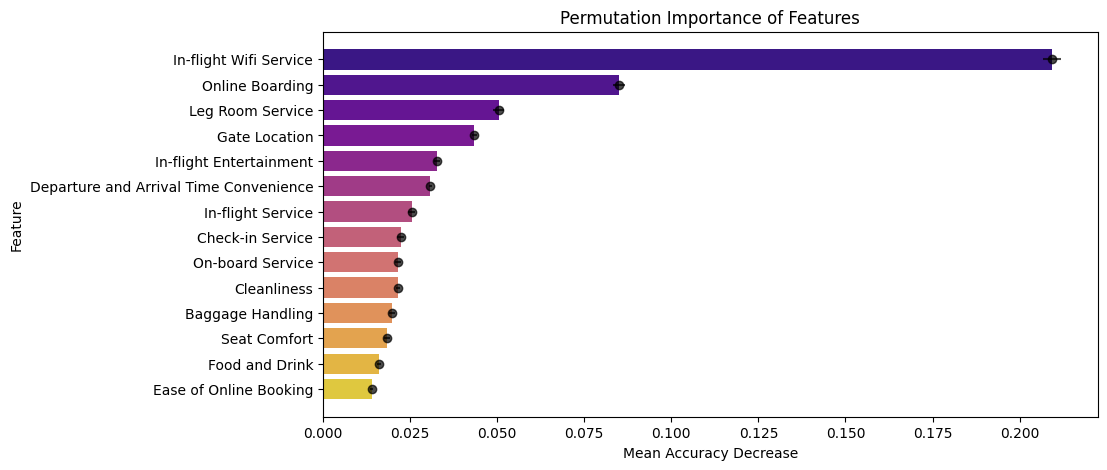

In [ ]:
# Perform Permutation Importance on the trained model
perm_importance = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42, scoring="accuracy")

# Store results in a DataFrame
perm_df = pd.DataFrame({
    "Feature": X_test.columns,
    "Mean Importance": perm_importance.importances_mean,
    "Std Dev": perm_importance.importances_std
})

# Sort by mean importance
perm_df = perm_df.sort_values(by="Mean Importance", ascending=False)

# Display results
print(perm_df)

# Ensure Std Dev is a NumPy array
xerr_values = np.array(perm_df["Std Dev"])

# Plot Permutation Importance
plt.figure(figsize=(10, 5))
sns.barplot(x=perm_df["Mean Importance"], y=perm_df["Feature"], palette="plasma")

# Add error bars separately
plt.errorbar(perm_df["Mean Importance"], perm_df["Feature"], xerr=xerr_values, fmt='o', color='black', alpha=0.7)

plt.title("Permutation Importance of Features")
plt.xlabel("Mean Accuracy Decrease")
plt.ylabel("Feature")
plt.show()

#### Linear Regression

R² Score: 0.3984
Mean Absolute Error (MAE): 0.6381
Mean Squared Error (MSE): 0.6012
Root Mean Squared Error (RMSE): 0.7754


<ipython-input-39-95ee807959a4>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients["Coefficient"], y=coefficients["Feature"], palette="coolwarm")


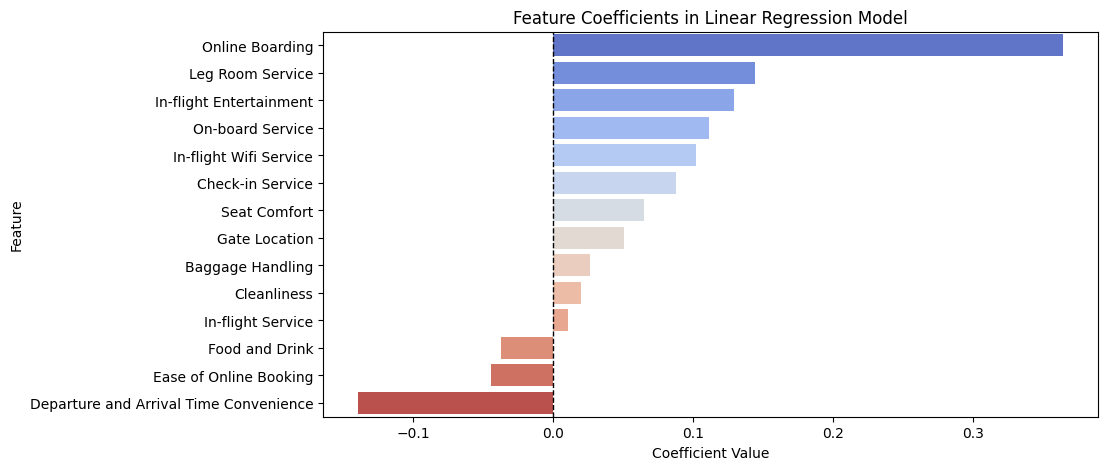

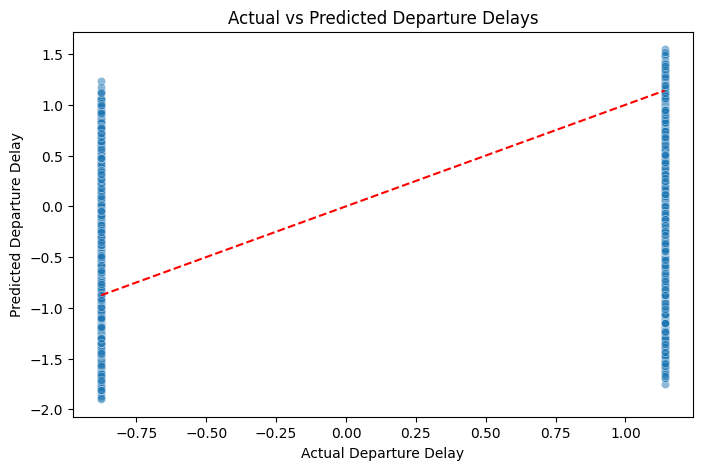

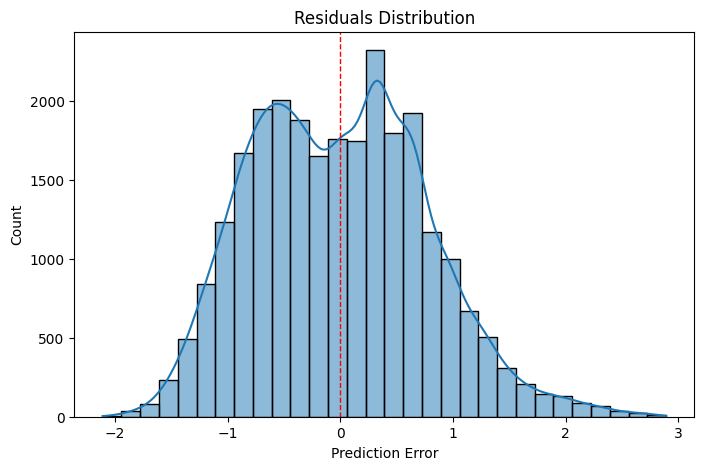

In [ ]:
# Define features (same rating features used before)
X = df_encoded[rating_features]

# Define new target variable (Satisfaction)
y = df_encoded["Satisfaction"]

# Split the data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize & Train Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred = lin_reg.predict(X_test)

# Evaluate Model Performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print results
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Display feature coefficients
coefficients = pd.DataFrame({"Feature": rating_features, "Coefficient": lin_reg.coef_})
coefficients = coefficients.sort_values(by="Coefficient", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=coefficients["Coefficient"], y=coefficients["Feature"], palette="coolwarm")
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.title("Feature Coefficients in Linear Regression Model")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # Ideal line
plt.xlabel("Actual Departure Delay")
plt.ylabel("Predicted Departure Delay")
plt.title("Actual vs Predicted Departure Delays")
plt.show()

# Residual Plot: Errors Distribution
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.title("Residuals Distribution")
plt.show()

In [ ]:
# Select features (including original and engineered)
features = ['Age', 'Flight Distance', 'In-flight Wifi Service',
            'Departure and Arrival Time Convenience', 'Ease of Online Booking',
            'Gate Location', 'Food and Drink', 'Online Boarding', 'Seat Comfort',
            'In-flight Entertainment', 'On-board Service', 'Leg Room Service',
            'Baggage Handling', 'Check-in Service', 'In-flight Service',
            'Cleanliness', 'Departure Delay', 'Arrival Delay',
            'Long Delay', 'Loyal Business Traveler']

# Define the target variable
target = 'Satisfaction'

# Extract the selected features and target from the DataFrame
X = df_encoded[features]
y = df_encoded[target]

In [ ]:
X.head()

,Age,Flight Distance,In-flight Wifi Service,Departure and Arrival Time Convenience,Ease of Online Booking,Gate Location,Food and Drink,Online Boarding,Seat Comfort,In-flight Entertainment,On-board Service,Leg Room Service,Baggage Handling,Check-in Service,In-flight Service,Cleanliness,Departure Delay,Arrival Delay,Long Delay,Loyal Business Traveler
0,0.566960,-0.370261,0.204090,-0.037727,0.173445,0.018048,1.349867,-0.187037,1.181428,1.230787,-0.297587,-1.026310,1.159206,0.547894,1.153946,1.304487,-0.333948,-0.261490,0,0
1,-0.292868,-0.370261,-0.548166,-0.692719,-0.539957,-0.764109,-0.153973,1.293662,0.423441,1.230787,1.256300,1.252898,1.159206,-0.241883,1.153946,1.304487,0.296454,0.623553,0,0
2,0.103976,-0.338179,0.956346,0.617265,0.886847,0.800206,1.349867,1.293662,1.181428,-0.268414,-0.297587,-0.266574,-0.535681,0.547894,-0.545774,1.304487,-0.386481,-0.391644,0,0
3,0.699242,0.716512,-0.548166,-0.692719,-0.539957,-0.764109,0.597947,0.553313,1.181428,1.230787,1.256300,1.252898,1.159206,-0.241883,1.153946,0.543264,-0.386481,-0.391644,0,0
4,0.633101,2.285515,0.204090,-0.037727,0.173445,0.018048,0.597947,1.293662,0.423441,-0.268414,-0.297587,0.493162,-0.535681,-0.241883,-0.545774,1.304487,-0.386481,-0.365613,0,0


In [ ]:
y

,Satisfaction
0,-0.876487
1,1.140918
2,1.140918
3,1.140918
4,1.140918
...,...
129875,-0.876487
129876,-0.876487
129877,-0.876487
129878,1.140918


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R-squared: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

R-squared: 0.4255
Mean Absolute Error (MAE): 0.6194
Root Mean Squared Error (RMSE): 0.7577


                                   Feature  Coefficient
18                              Long Delay     1.314174
7                          Online Boarding     0.321927
1                          Flight Distance     0.164801
2                   In-flight Wifi Service     0.136328
3   Departure and Arrival Time Convenience    -0.136205
11                        Leg Room Service     0.128543
9                  In-flight Entertainment     0.113648
10                        On-board Service     0.101671
13                        Check-in Service     0.085611
17                           Arrival Delay    -0.064645
4                   Ease of Online Booking    -0.058845
8                             Seat Comfort     0.048148
5                            Gate Location     0.043194
15                             Cleanliness     0.031380
12                        Baggage Handling     0.031255
6                           Food and Drink    -0.030202
16                         Departure Delay     0

<ipython-input-42-02a2e8d0774e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')


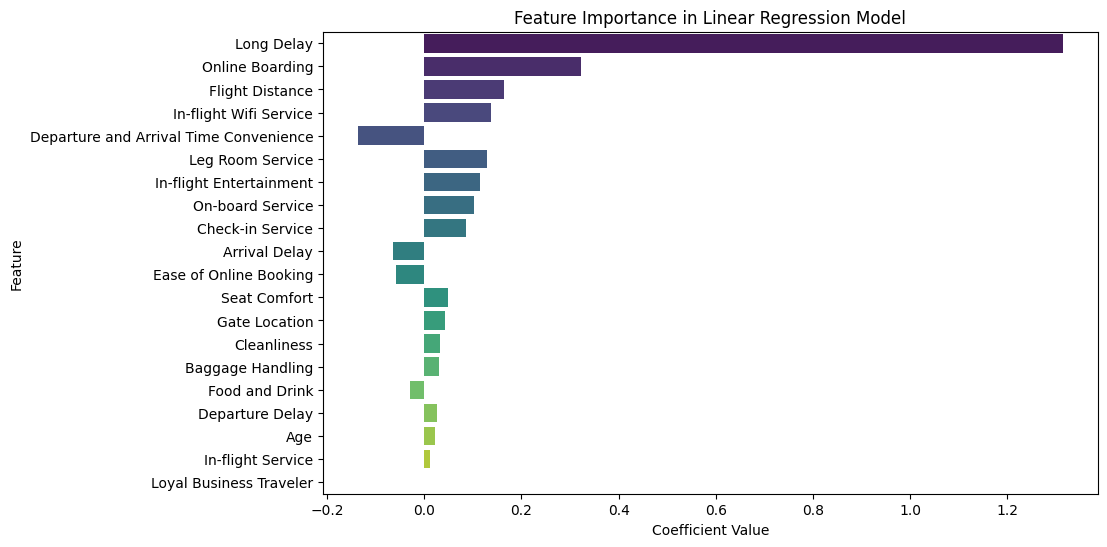

In [ ]:
# Get the coefficients of the trained model
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})

# Sort the coefficients by absolute value to see the most impactful features
coefficients = coefficients.sort_values(by='Coefficient', ascending=False, key=abs)

# Print or visualize the coefficients
print(coefficients)

# Optional: Create a bar plot to visualize the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')
plt.title('Feature Importance in Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

Number of zeros per feature:
Departure Delay                           73356
Arrival Delay                             72753
Departure and Arrival Time Convenience     6681
Ease of Online Booking                     5682
In-flight Wifi Service                     3916
Online Boarding                            3080
Leg Room Service                            598
Food and Drink                              132
In-flight Entertainment                      18
Cleanliness                                  14
On-board Service                              5
In-flight Service                             5
Seat Comfort                                  1
Check-in Service                              1
Gate Location                                 1
Flight Distance                               0
Baggage Handling                              0
Age                                           0
dtype: int64


<ipython-input-8-aa03bc2fa19f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=zero_counts.values, y=zero_counts.index, palette="magma")


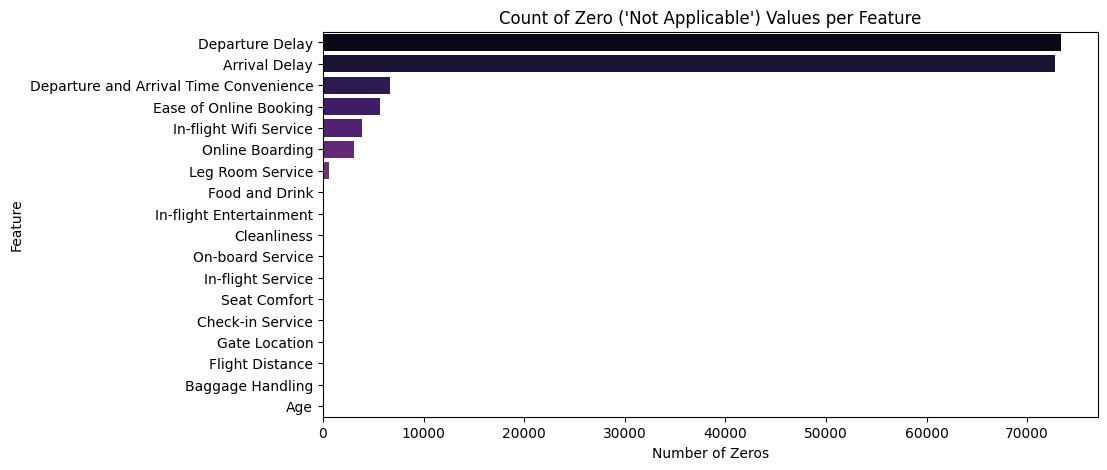

In [8]:
# Count zeros in each rating feature
features = ['Age', 'Flight Distance', 'In-flight Wifi Service',
            'Departure and Arrival Time Convenience', 'Ease of Online Booking',
            'Gate Location', 'Food and Drink', 'Online Boarding', 'Seat Comfort',
            'In-flight Entertainment', 'On-board Service', 'Leg Room Service',
            'Baggage Handling', 'Check-in Service', 'In-flight Service',
            'Cleanliness', 'Departure Delay', 'Arrival Delay',
            ]
zero_counts = (df_original[features] == 0).sum().sort_values(ascending=False)

# Display counts
print("Number of zeros per feature:")
print(zero_counts)

# Visualize the counts clearly
plt.figure(figsize=(10, 5))
sns.barplot(x=zero_counts.values, y=zero_counts.index, palette="magma")
plt.title("Count of Zero ('Not Applicable') Values per Feature")
plt.xlabel("Number of Zeros")
plt.ylabel("Feature")
plt.show()

In [11]:
# Identify lowest non-zero delays for Departure and Arrival
delay_cols = ["Departure Delay", "Arrival Delay"]

for col in delay_cols:
    # Exclude zeros and check the lowest unique values
    non_zero_delays = df_original[df_original[col] > 0][col].sort_values().unique()

    print(f"\nLowest non-zero values for {col}:")
    print(non_zero_delays[:10])  # Shows the 10 lowest values greater than zero


Lowest non-zero values for Departure Delay:
[ 1  2  3  4  5  6  7  8  9 10]

Lowest non-zero values for Arrival Delay:
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


### Unsupervised